In [2]:
import cv2

cap = cv2.VideoCapture(0)
ret, frame = cap.read()

if ret:
    cv2.imshow("Captured Image", frame)
    cv2.imwrite("image2.jpg", frame)
else:
    print("無法讀取影像")

cap.release()
cv2.destroyAllWindows()

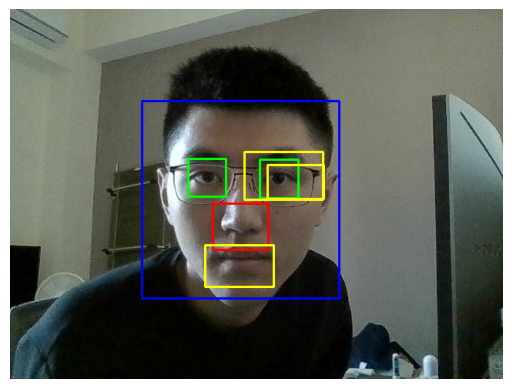

In [2]:
import cv2
import matplotlib.pyplot as plt

# 加載 Haar 特徵分類器
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 使用提供的正確路徑加載眼睛、鼻子和嘴巴分類器
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
nose_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_nose.xml')  # 預設鼻子分類器
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_mouth.xml')  # 預設嘴巴分類器

# 檢查分類器是否成功加載
if face_cascade.empty():
    print("Error: Unable to load face cascade classifier!")
if eye_cascade.empty():
    print("Error: Unable to load eye cascade classifier!")
if nose_cascade.empty():
    print("Error: Unable to load nose cascade classifier!")
if mouth_cascade.empty():
    print("Error: Unable to load mouth cascade classifier!")

# 讀取圖片
image = cv2.imread('image2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 偵測人臉
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    
    # 偵測眼睛
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
        
    # 偵測鼻子
    noses = nose_cascade.detectMultiScale(roi_gray)
    for (nx, ny, nw, nh) in noses:
        cv2.rectangle(roi_color, (nx, ny), (nx+nw, ny+nh), (0, 0, 255), 2)
        
    # 偵測嘴巴
    mouths = mouth_cascade.detectMultiScale(roi_gray)
    for (mx, my, mw, mh) in mouths:
        cv2.rectangle(roi_color, (mx, my), (mx+mw, my+mh), (0, 255, 255), 2)

# 顯示結果
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()